# Chapter 9: Unsupervised Learning Techniques

- **Dimensionality Reduction** (seen in previous chapter)
- **Clustering**: group similar instances together into clusters
- **Anomaly Detection**: Objective is to learn what "normal" data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a trend in a time series
- **Density Estimation**: estimating the probability density function (PDF) of the random process that generated the dataset. Defines clusters as continous gregions of high density

# 1. Clustering 

- Goal is to group similar instances together into clusters. 
- Clustering is a great tool for data analysis, computer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction etc

## 1.1 Clustering Applications

- **For customer segmentation**   
Cluster customers based on their purchases and their activity on your website. Useful to understand who are your customers are and adapt your products and marketing campaigns to each segment. Can also be useful in recomender systems to suggest content that other uers in the same clusters enjoyed.

- **Data Analysis**    
When analyzing a new dataset, can be helpful to run a clustering algorithm and then analyze each cluster separately.  

- **Dimensionality Reduction Technique**    
Once dataset has been clustered, we can measure how well an instance fits into a cluster (affinity).

- **Anomaly Detection (Outlier Detection**)   
Any instance that has a low affinity to all the clusters is likely to be an anomaly. Useful in detecting defects in manufacting or for fraud detection.

- **Semi-Supervised Learning**   
If we only have a few labels, we can perform clustering and propagate the lables to all instances in the same cluster. This technique greatly increase the number of labels available for subsequent supervised learning algorithm.

- **Search Engines**   
Search engines let you search for images that are similar to a reference image. We first apply a clustering algorithm to all the images. Similar iamges would end up in same clluster. When a user provide a reference image, we just find the image's cluster and then return all the image from that cluster.

- **Segment an image**   
By clustering pixels according to their color, then replace each pixel's colour with the mean colour of its cluster, we can reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems and makes it easier to detect the contour of each object.


## 1.2 K-Means (Lloyd-Forgt)

- Sometimes referred to as Lloyd-Forgy
- K-Means capable of clustering dataset very quickly and efficiently
- K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.  
- It is important to scale the input features before running K-Means, or the clusters will be very stretched and K-Means will perform poorly.
- Scaling features does not guarantee that all clusters will be nice and spherical but it generally improves things.

![figure9.2](images/figure9.2.png)

In [2]:
from sklearn.datasets import make_blobs
import numpy as np  

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [7]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k) # Want K clusters
y_pred = kmeans.fit_predict(X)

In [8]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [9]:
# five centroids that the algorithm found
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

### 1.2.1 K-Means Algorithm

- Start by placing centroids randomly (pick k instances at random and using their locations as centroids)
- Label the instances by assigning them to the closest centroid.
- Update the centroid and label the instances again until the centroids stop moving
- The algorithm is guaranteed to converge in a finite number of steps. But it may not be the optimum solution. This depends on the initial centroid initialization.

If data has no clustering structure, the computational complexity may increase exponentially witht he number of instances.
If data has clustering structure, the computational complexity is generally linear wrt number of instances, number of clusters and number of dimensions.

![figure7.4](images/figure9.4.png)

### 1.2.2 Hard Clustering and Soft Clustering

- Hard Clustering - assign each instance to a single cluster
- Soft Clustering - assign each instance a score per cluster.

The score can be the distance between the instance and the centroid. It can also be a similarity score, such as Gaussian Radial Basis Function.

In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [12]:
# Soft Clustering example.
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

Example above, first instance is located at a distance of 2.81 from the first centroid, 0.33 from the second centroid, 2.90 from the third centroid and so on. If we have high-dimensional dataset and we transform the data this way, we will have k-dimensional dataset. This transformation can be very efficient nonlinear dimensionality reduction technique.

### 1.2.3 Improving Centroid Initialization

To mitigate the risk of obtaining suboptimal solution, we can improve centroid initilization.

####  1. If we know where the centroids should be, we can set the `init` hyperparameter.

In [20]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

#### 2. Run the algorithm multiple times with different random initialization and keep the best solution.

- Another solution is to run the algorithm multiple times with different random initialization and keep the best solution.
- n_init hyperparameter controls the number of random initializations
- Scikit-Learn runs 10 times by default and keeps the best solution measured by model's inertia.
- Inertia: the measn squared distance between each instance and its closest centroid.

In [23]:
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [24]:
kmeans.inertia_

211.59853725816836

#### 3. K-Means++

- Another improvement is the K-Means++ algorithm, proposed in 2006.
- Introduced a smarter initialization step that tends to select centroids that are distant from one another.
- This improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution
- The additional computation is worth it because it drastically reduce the number of times the algorhtm needs to be run to find the optimal solution

The KMeans class uses this initialization by default. If we want the original method, we can set the `init` hyperparameter to random though we rarely need to do this.

### 1.2.4 Accelerated K-Means 

- Accelerates the algorhtm by avoiding many unnecessary distance calculations.
- This is the algorithm the KMeans class uses by default. 
- We can force it to use the original algorithm by setting `algorithm` hyperparameter to `"full"` although we probably will never need to.

### 1.2.5 Mini-Batch K-Means

- Another variant of K-Means algorithm.
- Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration.
- This speeds up the algorithm typically and possible to cluster huge datasets that do not fit in memory.

In [25]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

In [26]:
minibatch_kmeans.inertia_

224.68584873118633

But the inertia is generally slightly worse especially when numher of clusters increase.

![figure9.6](images/figure9.6.png)

If dataset does not fit in memory, we can use the `memmap` class.   
- We can pass one mini-batch at a time to the `partial_fit()` method.

### 1.2.6 Finding Optimal Number of Clusters using Silhouette Coefficient

- The inertia is not a good performance metric when trying to choose k beacuse it keeps getting lower as we increase k.

![figure9.8](images/figure9.8.png)

- A more precise approach but also more computational expensive is to use the sihouette score, which is the mean sihouette coefficient over all the instances.

Sihouette Score = $\frac{b - a}{max(a, b)}$. Score will be between -1 and +1.
- $a$ is the mean distance to the other instances in the same cluster (i.e mean intra-cluster distance)
- $b$ is the mean nearest-cluster distance (i.e mean distance to the instances of the next closest cluster)

In [27]:
from sklearn.metrics import silhouette_score 
silhouette_score(X, kmeans.labels_)

0.655517642572828

Coefficient close to +1 means that the intance is well inside its own cluster and far from other clusters.   
Coefficient close to 0 means that it is close to a cluster boundary   
Coefficient close to -1 means that the instance may have been assigned to the wrong cluster

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


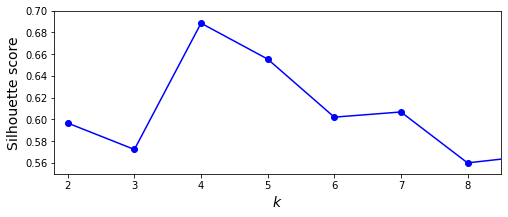

In [30]:
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

### 1.2.7 Silhouette Diagram

- An even more informative visualization is obtained when we plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient.
- The shape's height indicates the number of instances the cluster contains.
- The shape's width represents the sorted silhouette coefficients of the instances in the cluster. Wider is better. 
- The dashed line indicates the mean silhouette coefficient.

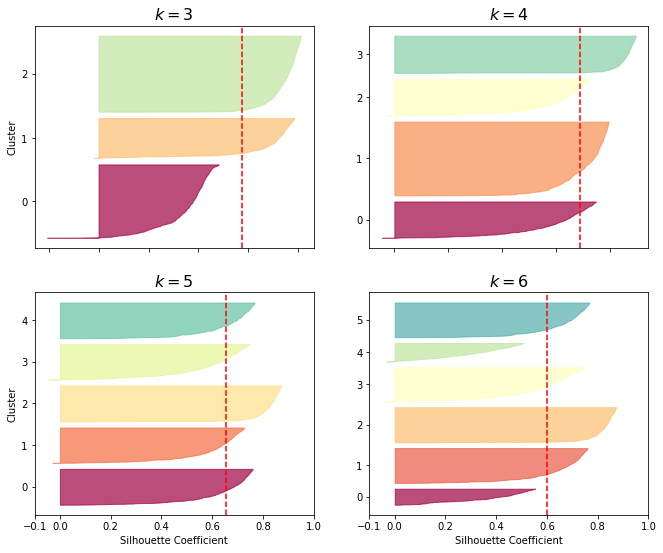

In [32]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


When most of the instances in a cluster have a lower coefficient than the mean silhouette score for that cluster, the cluster is bad since it  means its instances are much too close to other clusters.   
- k=3 and k=6 are bad clusters.
- k=4 and k=5 are good clusters since most instances extend beyond the dashed line.
- When k=4, the cluster at index 1 is rather big.
- When k=5, all clusters have similar sizes.
- So even though the overall silhouette score from k=4 is slightly greater than k=5, k=5 is a better cluster size.

### 1.2.8 Limitations of K-Means

- Does not behave well when the clusters have varying sizes, different densities, or nonspherical shapes.

![figure7.11](images/figure9.11.png)

- It is important to scale the input features before running K-Means, or the clusters will be very stretched and K-Means will perform poorly.
- Scaling features does not guarantee that all clusters will be nice and spherical but it generally improves things.

## 1.3 Using Clustering for Image Segmentation

- **Image Segmentation**: partition an image into multiple segments
- **Semantic Segmentation**: all pixels that are part of the same object type get assigned to the same segment
- **Instance Segmentation**: all pixels that are part of the same individual object are assigned to the same segment
- **Color Segmentation**: assign pixels to the same segment if they have similar color. 

In [34]:
# Download the ladybug image
import urllib.request

images_path = os.path.join(".", "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x2290709abe0>)

In [35]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape #(height, width, number of color channels)

(533, 800, 3)

There are 3 color channels, in this case RGB. This means that for each pixel, there is a 3D vector containing the intensities of red, green and blue each between 0.0 and 1.0 (or between 0 and 255 if we use `imageio.imread()`)

- For each color, it looks for the mean color of the pixel's color cluster.
- Example: all shades of green may be replaced with the same light green color (assuming the mean color of the green cluster is light green).
- Then it reshapes this long list of colors to get the same shape as the original image.

In [36]:
X = image.reshape(-1, 3) #-1 refers to the inferred value from the length of the array 
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [38]:
len(X) # height x width

426400

In [44]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

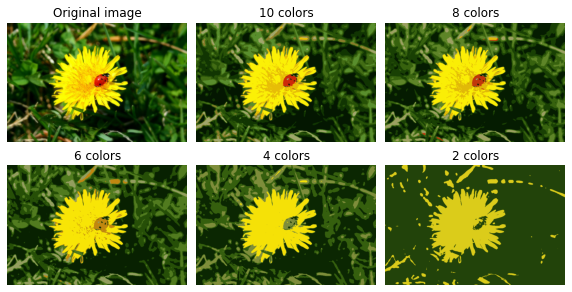

In [45]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## 1.4 Using Clustering for Preprocessing

- Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm.

In [54]:
# Load Data
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

# Fit a logisitc regression mode
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)


0.9688888888888889

- First cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters then apply Logistic


In [55]:
# Try adding K-Means as a preprocessing step
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])

pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

0.9777777777777777

- Finding a good k value is simpler here because we can just the result of the classification 

In [56]:
from sklearn.model_selection import GridSearchCV    

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.4s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [57]:
grid_clf.best_params_

{'kmeans__n_clusters': 54}

In [58]:
grid_clf.score(X_test, y_test)

0.98

# 2. Density Estimation

- This is the task of estimating the probability density function (PDF) of the random process that generated the dataset.
- Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies.
- Also useful for data analysis and visualization.

## 2.1 DBSCAN

The algorithm works well if  
- clusters are dense enough
- clusters are well separated by low-density region

DBSCAN works the following way:
- The algorithm defines clusters as continuous regions of high density
- For each instance, the algorithm counts how many instances are location within a small distance $\epsilon$ from it. This region is called the instance's $\epsilon$ neighbourhood
- If an instance has at least `min_samples` instances in its $\epsilon$ neighbourhood (including itself), then it is considered a *core instance* (located in dense region)
- All instances in the neighbourhood of a core instances belong to the same cluster.
- This neighbourhood may include other core instances.
- Therefore, a long sequence of neighbouring core isntances forms a single cluster.
- Any instance that is not a core instance and does not have one in its neighbourhood is considered an anomaly.

In [68]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [69]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

- Cluster index = -1 means they are considered as anomalies by the algorithm.
- We can identify the indices of the core instances using `core_sample_indices_`
- We can identify the core instances themselves using `components_`

In [70]:
len(dbscan.core_sample_indices_)

808

In [71]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [72]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

### 2.1.1 Predicting clusters

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [76]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2], dtype=int64)

In [77]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

### 2.1.2 Summary of DBSCAN

**Advantages**

- DBSCAN is capable of identifying any number of clusters of any shape
- Is robust to outliers
- Has only two hyperparameters: `eps` and `min_samples`

**Disadvantages**

- If Density varies significantly across the clusters, it can be impossible for it to capture all the clusters properly.

# 3. Other Clustering Algorithms

## 3.1 Agglomerative Clustering

![agglomerative](images/agglomerative.gif)

- A hierarchy of clusters is built from the bottom up
- At each iteration, agglomerative clustering connects the nearest pair of clusters.
- Produces a flexible and informative cluster tree instead of forcing you to choose a particular cluster scale
- Can be used with any pairwise distance

## 3.2 Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH)

- Designed for very large datasets and can be faster than batch K-Means as long as number of feature < 20.
- A clustering algorithm that can cluster large datasets by first generating a small and compact summary of the large dataset that retains as much information as possible.
- During training, it builds a tree structure containing just enough information to quickly assign each new instance to a cluster without having to store all the instances in the tree.
- This approach allows it to use limited memory when handling huge datasets.

## 3.3 Mean-Shift

![meanshift](images/meanshift2.png)

- Algorithm starts by placing a circle centered on each instance.
- For each circle, it computes the mean of all the instances located within it and it shifts the circle so that it is centered on the mean
- Then it iterates this mean-shifting step until all the circles stop moving.
- Mean-shift shfits the circles in the direction of higher density, until each of them has found a lock density meximum.
- Finally, all instances whose circle have settled int he same place are assigned to the same cluster.
- Like DBSCAN, it can find any number of clusters of any shape and has very few hyperparameters and relies on local density estimaion.
- Unlike DBSCAN, it tends to chop clusters into pieces when they have internal density variations.
- But the computation complexity is $O(m^{2})$ so not suited for large datasets

## 3.4 Affinity Propagation

![affinity](images/affinity.png)

- Algorithm uses a voting system where instances vote for similar instances to be their representatives.
- Once algorithm converges, each representative and its voters form a cluster.
- Affinity propagation can detect any number of clusters of different sizes.
- But the computation complexity is $O(m^{2})$ so not suited for large datasets

## 3.5 Spectral Clustering

![spectral](images/spectral.png)

- Algorithm takes a similarity matrix between the instances and creates a low-dimensional embedding from it (reduces dimensionality)
- Then it uses another clustering algorithm in this low-dimensional space (Scikit-Learn uses K-Means).
- Spectral clustering can capture complex cluster structures
- Also good to be used to cut graphs (eg: to identify clusters of friends on a social network)
- But it does not scale well to large numbers of instances 
- It does not behave well when the clusters have very different sizes.

## Comparison of all clustering algorithms

![comparison](images/comparison.png)

# 4. Gaussian Mixtures

- Can be used for density estimation, clustering and anomaly detection
- Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions who parameters are unknown
- All instances generated from a single gaussian distribution form a cluster that looks like an ellipsoid.
- Each cluster can have a different ellipsoidal shape, size, density and orientation.
- When we observe an instance, we know it was generated from one of the Gaussian distributions but not told which one and do not know what the parameters are.

## 4.1 Clustering with Gaussian Mixtures

In [13]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [14]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

The parameters that the algorithm estimated are:

In [15]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [16]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [17]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

We can check whether the algorithm converged and how many iterations it took

In [18]:
gm.converged_

True

In [19]:
gm.n_iter_

4

We can use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster (soft clustering).

In [20]:
# Hard Clustering
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [21]:
# Soft Clustering
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

Plotting the resulting decision boundary and density contours

In [26]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)


In [27]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt 

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

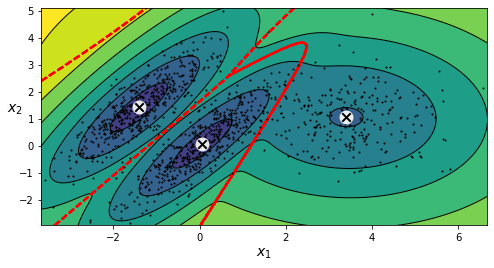

In [28]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

## 4.2 Anomaly Detection with Gaussian Mixtures

- Anomaly Detection is the task of detecting instances that deviate strongly from the norm
- Using Gaussian Mixtures, any instance located in the low-density region can be considered an anomaly.

In [29]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

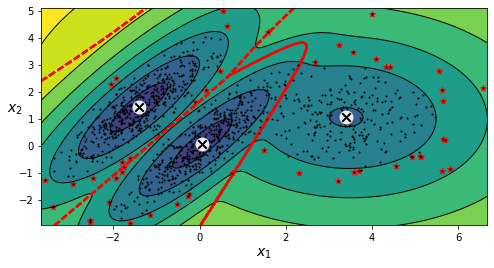

In [30]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

# 5. Other Algorithms for Anomaly and Novelty Detection

## 5.1 PCA

- If we compare the reconstruction error of a normal instance with the reconstruction error of an anomaly, the latter will usually be larger.

## 5.2 Fast-MCD

- Assumes that the normal instances are generated from a single Gaussian Distribution.
- Also assumes that the dataset is contaminated with outliers that were not generated from this Gaussian distribution.
- When algorithm estimates the parameters of the Gaussian Distribution, it is careful to ignore the instances that are most likely outliers.

## 5.3 Isolation Forest

![isolation](images/isolation2.png)

- An efficient algorithm for outlier detection especially in high-dimensional datasets.
- The algorithm builds a Random Forest in which each decision tree is grown randomly.
- At each node, it picks a feature randomly then picks a random threshold value to split the dataset in two.
- The dataset gets chopped gradually into pieces until all instances end up isolated from other instances.
- Anomalies are usually far from other instances so on avereage, they tend to get isolated in fewer steps than normal instances

## 5.4 Local Outlier Factor

![outlier](images/localoutlier.png)

- Algorithm compares the density of instances around a given instance to the density around its neighbours.
- An anomaly is often more isolated than it *k* nearest neighbours.